In [ ]:
import numpy as np

In [50]:
# 2 things we need for Bandit: how many arms and the reward for each arm
num_of_arms = 10

class Bandit:
    # We want this to be stochastic, not deterministic
    # Include some randomness when we generate reward
    def __init__(self, num_of_arms):
        # Generate 10 random numbers to be the rewards for the 10 arms
        # Treat each of these numbers as the mean of a Gaussian distribution
        self.mean = np.random.rand(num_of_arms) * 100
        self.std = np.random.rand(num_of_arms)
    
    # Take some action as input and return the reward-- sampled from the Gaussian distribution (using randn)
    def step(self, action):
        reward = np.random.randn() * self.std[action] + self.mean[action]
        return reward
    
class ExplorationThenCommit:
    # This algorithm needs 2 main functionalities: 
    # 1. Output some action
    # 2. Learn from the reward of the action taken 
    
    def __init__(self, budget, num_of_arms):
        self.t = 0
        self.budget = budget
        self.rewards = [[] for _ in range(num_of_arms)] 
        self.num_of_arms = num_of_arms
         
    def compute_q(self):
        # Go through all possible arm rewards and compute mean
        q = [np.mean(actions_rewards) for actions_rewards in self.rewards]
        return q
    
    def action(self):
        if self.t <= self.budget:
            action = np.random.choice(np.arange(self.num_of_arms)) # Choose randomly from list of actions
        else:
            action = np.argmax(self.compute_q()) # Choose the action with the highest mean reward
        self.t += 1 # Increment time step
        return action
    
    def learn(self, action, reward):
        self.rewards[action].append(reward)

In [53]:
# Run a simple trial with 100 steps, 5 arms, 50 rounds of exploration
T = 100
num_of_arms = 5
budget = 50

# Create metric to track rewards
metrics = np.zeros(T)

# Create bandit and algorithm
bandit = Bandit(num_of_arms)
algo = ExplorationThenCommit(budget=budget, num_of_arms=num_of_arms)

for t in np.arange(T):
    # Generate action via algorithm's selection
    action = algo.action()
    # Take action and get reward from bandit
    reward = bandit.step(action)
    
    # Track reward
    metrics[t] = reward
    
    # Learn from the action and reward
    algo.learn(action, reward)

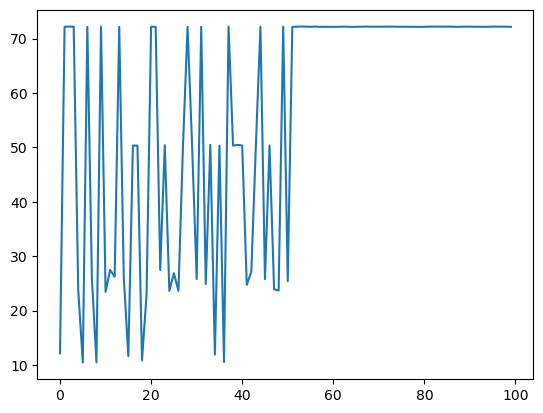

In [54]:
import matplotlib.pyplot as plt

# Plot performance-- rewards over time
# As we can see, either this algorithm or this combination of parameters does not perform well
plt.plot(metrics)

With randomness, we can see with the plots that when we re-run the trials, sometimes the algorithm commits rewards differently.

In [55]:
# Now try running 50 trials each with 100 steps, 5 arms, 50 rounds of exploration
T = 100
num_of_arms = 5
budget = 50
runs = 50 # Number of trials

# Create metric to track rewards for each run
metrics = np.zeros((runs, T))

for run in np.arange(runs):
    # Create bandit and algorithm
    bandit = Bandit(num_of_arms)
    algo = ExplorationThenCommit(budget=budget, num_of_arms=num_of_arms)
    for t in np.arange(T):
        # Generate action via algorithm's selection
        action = algo.action()
        # Take action and get reward from bandit
        reward = bandit.step(action)
        
        # Track reward for this run
        metrics[run, t] = reward
        
        # Learn from the action and reward
        algo.learn(action, reward)

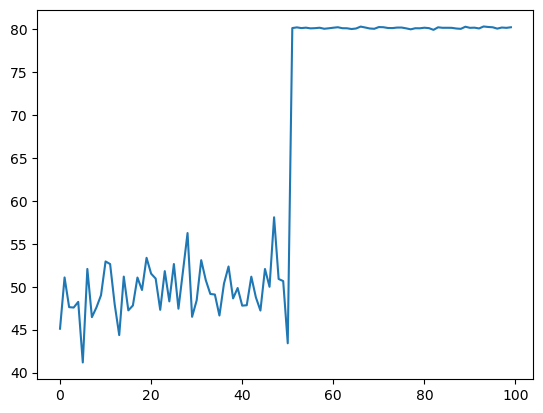

In [56]:
plt.plot(metrics.mean(axis=0))

Now me modify Bandit to track the optimal arm.

In [57]:
class Bandit:
    def __init__(self, num_of_arms):
        # Generate 10 random numbers to be the rewards for the 10 arms
        # Treat each of these numbers as the mean of a Gaussian distribution
        self.mean = np.random.rand(num_of_arms) * 100
        self.std = np.random.rand(num_of_arms) # <-- To make it stochastic
        # self.std = np.zeros_like(self.mean) # <-- To make it deterministic 

    # Track the optimal arm
    def optimal_arms(self):
        return np.argmax(self.mean)
    
    # Take some action as input and return the reward-- sampled from the Gaussian distribution (using randn)
    def step(self, action):
        reward = np.random.randn() * self.std[action] + self.mean[action]
        return reward

In [58]:
# Now try running 50 trials each with 100 steps, 5 arms, 50 rounds of exploration
T = 100
num_of_arms = 5
budget = 50
runs = 50 # Number of trials

# Create metric to track rewards for each run
metrics = np.zeros((runs, T))

for run in np.arange(runs):
    # Create bandit and algorithm
    bandit = Bandit(num_of_arms)
    algo = ExplorationThenCommit(budget=budget, num_of_arms=num_of_arms)
    for t in np.arange(T):
        # Generate action via algorithm's selection
        action = algo.action()
        # Take action and get reward from bandit
        reward = bandit.step(action)
        
        # Track reward for this run, using 1 if optimal arm was chosen, else 0
        metrics[run, t] = (action == bandit.optimal_arms())
        
        # Learn from the action and reward
        algo.learn(action, reward)

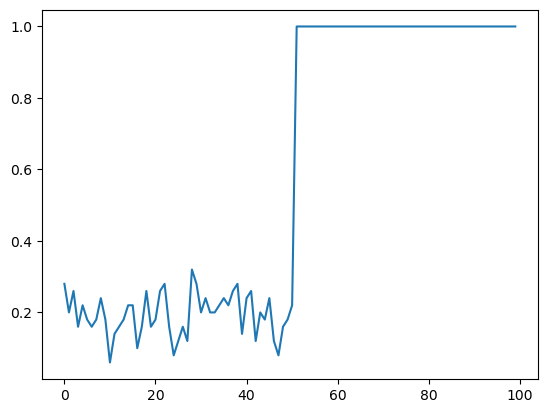

In [59]:
plt.plot(metrics.mean(axis=0))

Note: in more complex applications, running 50 trials successively would be very slow (might have to run overnight). You can parallelize them to improve speed.
In the homework, make sure to include plots.